# KC Housing data

Hi Greg, this is mostly so I can play with git but once we're both comfortable I was thinking that we could use this as the final jupyter notebook.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
print('View ' + str(round(df.isna().sum()['view']/len(df.view) *100, 2)) + ' % NaN')

print('Waterfront ' + str(round(df.isna().sum()['waterfront']/len(df.waterfront) *100, 2)) + ' % NaN')

print('Year Renovated ' + str(round(df.isna().sum()['yr_renovated']/len(df.yr_renovated) *100, 2)) + ' % NaN')

View 0.29 % NaN
Waterfront 11.0 % NaN
Year Renovated 17.79 % NaN


In [6]:
# Change all strange header names to ones we like

df = df.rename(columns={'date' : 'date_sold'})
df = df.rename(columns={'price' : 'price_sold'})
df = df.rename(columns={'bathrooms' : 'bathrooms_per_bedroom'})
df = df.rename(columns={'view' : 'view_grade'})
df = df.rename(columns={'sqft_above' : 'sqft_not_basement'})
df = df.rename(columns={'sqft_living15' : 'sqft_living_15_neighbours'})
df = df.rename(columns={'sqft_lot15' : 'sqft_lot_15_neighbours'})

In [7]:
# SAY WHY WE USE MEDIAN

df = df.fillna(value={'yr_renovated' : 0})
df = df.fillna(value={'view_grade' : df.view_grade.median()})
df = df.fillna(value={'waterfront' : df.waterfront.median()})

In [8]:
# EXPLAIN MATHS

df.sqft_basement = (df.sqft_living - df.sqft_not_basement)

In [9]:
# WHY INT64

df.date_sold = pd.to_datetime(df.date_sold)
df.yr_renovated = df.yr_renovated.astype('int64')

In [10]:
df["coordinates"]=list(zip(df.lat,df.long))


In [11]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms_per_bedroom,sqft_living,sqft_lot,floors,waterfront,view_grade,...,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours,coordinates
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"(47.5112, -122.257)"
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"(47.721000000000004, -122.319)"
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"(47.7379, -122.23299999999999)"
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"(47.5208, -122.39299999999999)"
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"(47.6168, -122.045)"


In [12]:
df=df.drop(index=15856,axis=0)

In [13]:
df.yr_built.describe()

count    21596.000000
mean      1971.000787
std         29.375460
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

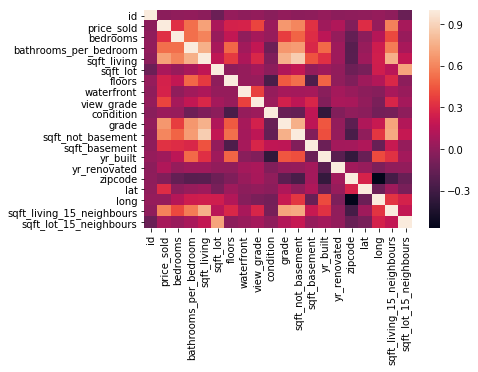

In [14]:
sns.heatmap((df.corr()))

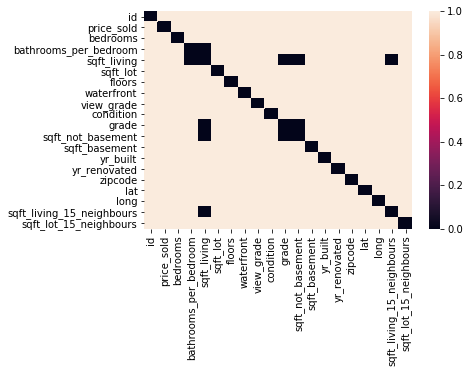

In [15]:
sns.heatmap((df.corr()<0.75)&(df.corr()>-0.75))

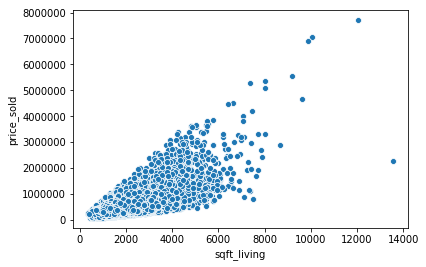

In [16]:
sns.scatterplot(x="sqft_living",y="price_sold",data=df)

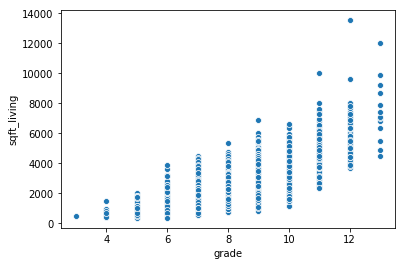

In [17]:
sns.scatterplot(x="grade",y="sqft_living",data=df)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


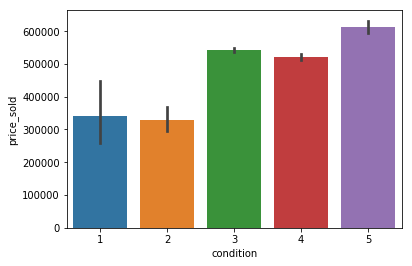

In [18]:
sns.barplot(x="condition",y="price_sold",data=df)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


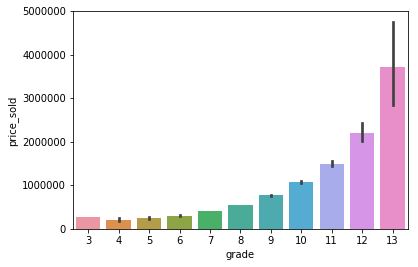

In [19]:
sns.barplot(x="grade",y="price_sold",data=df)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


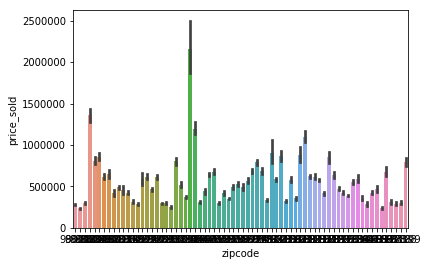

In [20]:
sns.barplot(x="zipcode",y="price_sold",data=df)

In [21]:
# sns.barplot(x="condition",y="zipcode",data=df)

In [22]:
df["log_price"]=np.log(df["price_sold"])

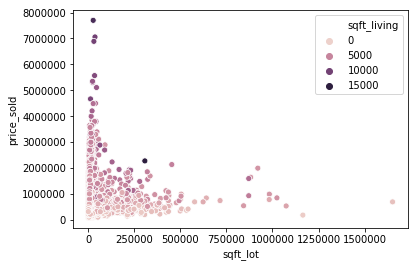

In [23]:
# Not perfectly correalated whereas living area is.
sns.scatterplot(x="sqft_lot",y="price_sold",data=df,hue="sqft_living")

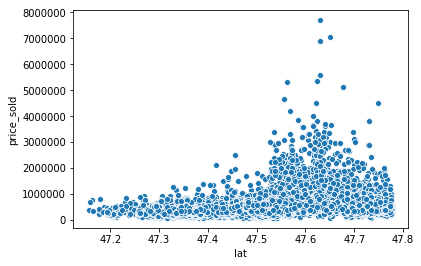

In [24]:
sns.scatterplot(x="lat",y="price_sold",data=df)

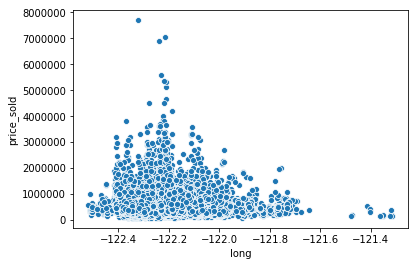

In [25]:
sns.scatterplot(x="long",y="price_sold",data=df)

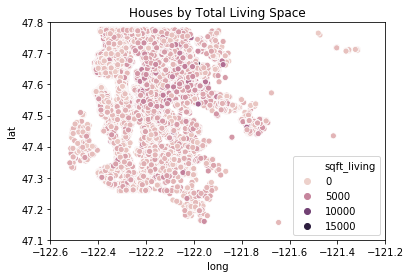

In [121]:
#some centering of living space in Centre-North
scatter_sqft_living=sns.scatterplot(x="long",y="lat",data=df,hue="sqft_living")
scatter_sqft_living.set(ylim=(47.1,47.8),xlim=(-122.6,-121.2),title="Houses by Total Living Space")
scatter_sqft_living.get_figure().savefig("Houses by Total Living Space.png")

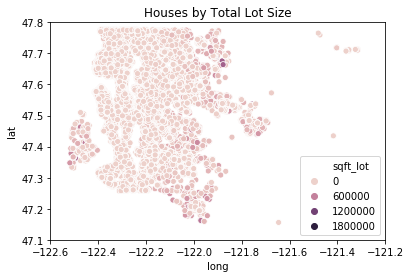

In [119]:
# Lot size does not correlate with most expensive neighbourhood
scatter_sqft_lot=sns.scatterplot(x="long",y="lat",data=df,hue="sqft_lot")
scatter_sqft_lot.set(ylim=(47.1,47.8),xlim=(-122.6,-121.2),title="Houses by Total Lot Size")
scatter_sqft_lot.get_figure().savefig("Houses by Total Lot Size.png")

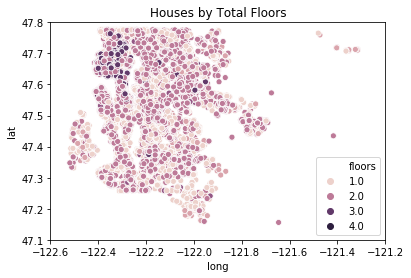

In [122]:
#Shows high density housing => Not proportional to price
scatter_floors=sns.scatterplot(x="long",y="lat",data=df,hue="floors")
scatter_floors.set(ylim=(47.1,47.8),xlim=(-122.6,-121.2),title="Houses by Total Floors")
scatter_floors.get_figure().savefig("Houses by Total Floors.png")

In [29]:
df.price_sold.describe()

count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price_sold, dtype: float64

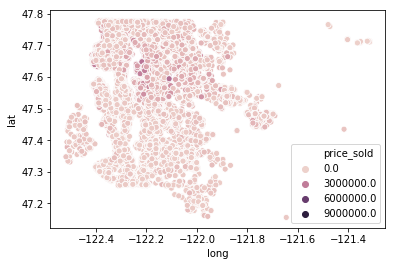

In [30]:
sns.scatterplot(x="long",y="lat",data=df,hue="price_sold")

In [31]:
price_sold_25=df["price_sold"].quantile(0.25)
price_sold_50=df["price_sold"].quantile(0.5)
price_sold_75=df["price_sold"].quantile(0.75)

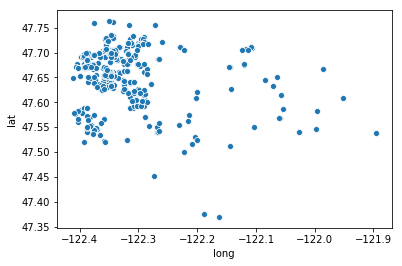

In [61]:
sns.scatterplot(x="long",y="lat",data=df.loc[(df["floors"]==3),:])

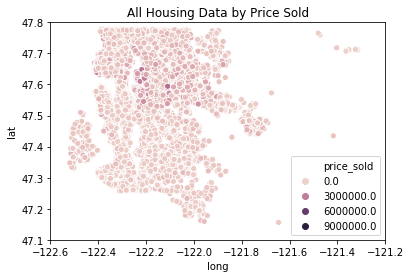

In [141]:
scatter_all=sns.scatterplot(x="long",y="lat",data=df,hue="price_sold")
scatter_all.set(ylim=(47.1,47.8),xlim=(-122.6,-121.2),title="All Housing Data by Price Sold")
scatter_all.get_figure().savefig("All Houses.png")

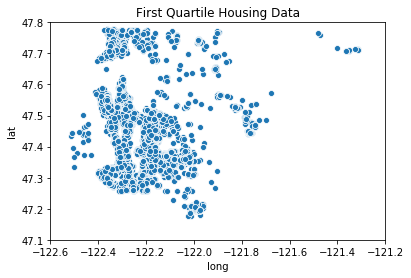

In [111]:
scatter1=sns.scatterplot(x="long",y="lat",data=df.loc[(df["price_sold"]<price_sold_25),:])
scatter1.set(ylim=(47.1,47.8),xlim=(-122.6,-121.2),title="First Quartile Housing Data")
scatter1.get_figure().savefig("First Quartile Housing Data.png")

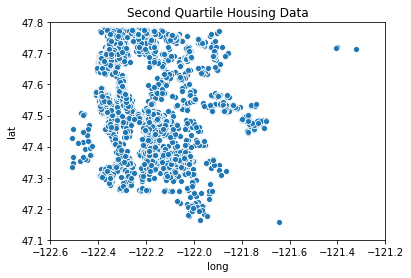

In [112]:
scatter2=sns.scatterplot(x="long",y="lat",data=df.loc[(df["price_sold"]<price_sold_50)
                                             &(df["price_sold"]>price_sold_25),:])
scatter2.set(ylim=(47.1,47.8),xlim=(-122.6,-121.2),title="Second Quartile Housing Data")
scatter2.get_figure().savefig("Second Quartile Housing Data.png")

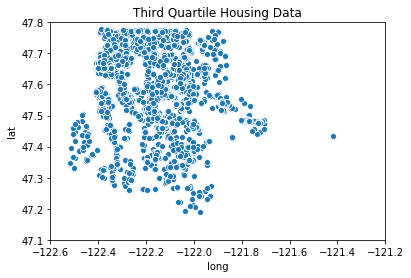

In [113]:
scatter3=sns.scatterplot(x="long",y="lat",data=df.loc[(df["price_sold"]<price_sold_75)
                                             &(df["price_sold"]>price_sold_50),:])
scatter3.set(ylim=(47.1,47.8),xlim=(-122.6,-121.2),title="Third Quartile Housing Data")
scatter3.get_figure().savefig("Third Quartile Housing Data.png")

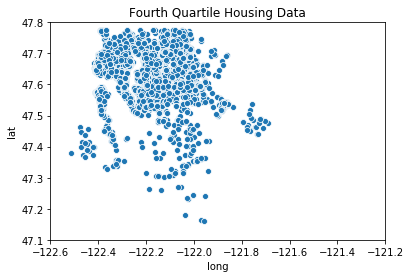

In [114]:
scatter4=sns.scatterplot(x="long",y="lat",data=df.loc[(df["price_sold"]>price_sold_75),:])
scatter4.set(ylim=(47.1,47.8),xlim=(-122.6,-121.2),title="Fourth Quartile Housing Data")
scatter4.get_figure().savefig("Fourth Quartile Housing Data.png")

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


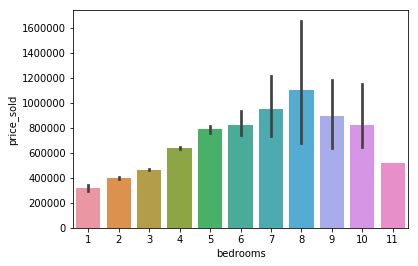

In [37]:
#How does bedrooms affect price? Clear linear relationship up to 8. Are the rest outliers?
sns.barplot(x="bedrooms",y="price_sold",data=df)

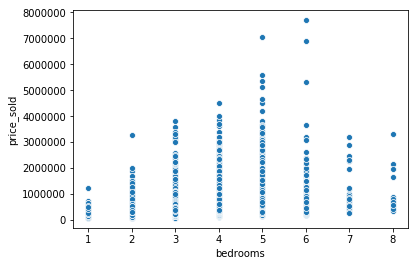

In [38]:
# Linear relationship here, do other things affect price? Location, condition, sqft_living? 
# This could explain the low prices for houses with many rooms
sns.scatterplot(x=df.loc[df["bedrooms"]<=8,"bedrooms"],y="price_sold",data=df)

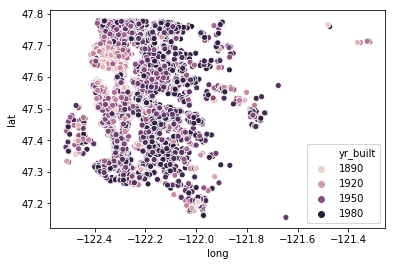

In [134]:
# How many outliers are there?
sns.scatterplot(x="long",y="lat",data=df.loc[df["yr_built"]<1940,:])

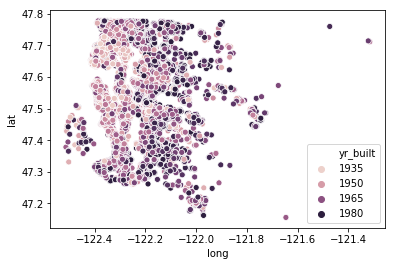

In [135]:
sns.scatterplot(x="long",y="lat",data=df.loc[(df["yr_built"]<1980)&(df["yr_built"]>1940),:],hue="yr_built")

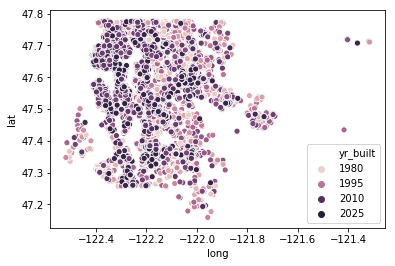

In [136]:
sns.scatterplot(x="long",y="lat",data=df.loc[(df["yr_built"]>1980),:],hue="yr_built")

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


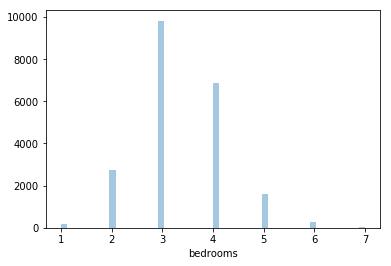

In [40]:
# How many properties and how many bedrooms? 
sns.distplot(df.loc[df["bedrooms"]<8,"bedrooms"],kde=False)

[(47.1, 47.8), (-122.6, -121.2)]

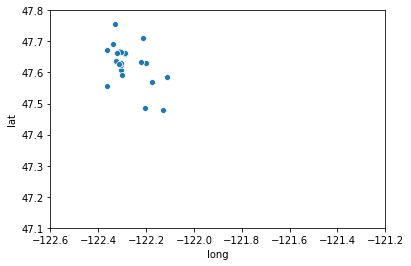

In [92]:
# Where are the houses with more than 8 bedrooms?
# Not many, look like outliers => can remove from our data?
scatter_mccgee=sns.scatterplot(x="long",y="lat",data=df.loc[(df["bedrooms"]>7),:])
scatter_mccgee.set(ylim=(47.1,47.8),xlim=(-122.6,-121.2))

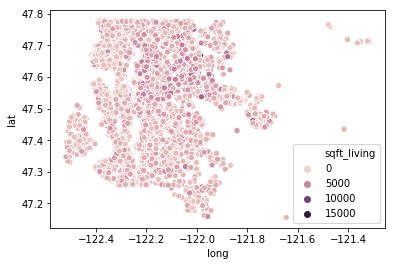

In [42]:
# Clear majority of properties. => Base data of this sample? Clear distribution of bedrooms so neighbourhood separate.
# Can we combine number of rooms with neighbourhood to maximise profitability?
# How is sqft_living affected?
sns.scatterplot(x="long",y="lat",data=df.loc[(df["bedrooms"]<=8),:],hue="sqft_living")

In [43]:
# import geopandas

# gdf = geopandas.GeoDataFrame(
#     df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))


In [44]:
"""
We don't have linear relationship for variables which affect price => bedrooms, sqft-living etc. => peaks and drops off


"""

"\nWe don't have linear relationship for variables which affect price => bedrooms, sqft-living etc. => peaks and drops off\n\n\n"

In [123]:
# df["price_bracket"]=0 Create new column
# df.reset_index()

In [96]:
df["price_bracket"][1234]


0

In [117]:
for i in df["price_bracket"]:
    if (df.loc[(df["price_sold"][i]<price_sold_25),"price_sold"]):
        df["price_bracket"][i]=0
    elif (df.loc[(df["price_sold"][i]>price_sold_25)&(df["price_sold"][i]<price_sold_50),"price_sold"]):
        df["price_bracket"][i]=1
    elif (df.loc[(df["price_sold"][i]>price_sold_50)&(df["price_sold"][i]<price_sold_75),"price_sold"]):
        df["price_bracket"][i]=2
    else:
        df["price_bracket"][i]=3


KeyError: True

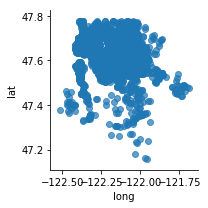

In [70]:
g = sns.FacetGrid(, col="price_sold")
g.map(plt.scatter, "long", "lat", alpha=.7)

In [67]:
# import geopandas as gpd
# import descartes

# kc_map=gpd.read_file("Books/book50.shp")
# fig,ax=plt.subplots(figsize=(15,15))
# kc_map.plot(ax=ax)

In [45]:
#Need subplots!
# for i in range(0,8):
#     sns.scatterplot(x="long",y="lat",data=df.loc[(df["bedrooms"]==i),:],hue="sqft_living")

# Define a new figure with matplotlib's .plot() function. Set the size of figure space
new_figure = plt.figure(figsize=(10,4))

# Add a subplot to the figure - a new axes
ax = new_figure.add_subplot(121)

# Add a second subplot to the figure - a new axes
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.plot(x, y, color='lightblue', linewidth=3, linestyle = '-.')

# Draw a scatter plot on 2nd axes
ax2.scatter([0.5, 2.2, 4.2, 6.5], [21, 19, 9, 26], color='red', marker='o')

# Set the limits of x and y for first axes
ax.set_xlim(0, 9), ax.set_ylim(5,35)

# Set the limits of x and y for 2nd axes
ax2.set_xlim(0, 9), ax2.set_ylim(5,35)

# Show the plot
plt.show()

In [126]:
price_sold_75

645000.0